In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

In [127]:
trainDF = pd.read_csv('train.csv')
trainDF.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
1,1,20,FV,81.0,11216,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,232600
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Normal,175500
3,3,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,199900
4,4,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000


In [87]:
trainDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,782.000000,782.000000,638.000000,782.000000,782.000000,782.000000,782.000000,782.000000,778.000000,782.000000,...,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,390.500000,56.259591,70.347962,10589.554987,6.121483,5.597187,1971.773657,1985.130435,105.026992,441.840153,...,95.507673,48.809463,21.543478,4.404092,16.372123,1.538363,51.053708,6.236573,2007.835038,183335.726343
std,225.888247,41.811330,24.235914,9682.490630,1.412156,1.121387,29.912226,20.555808,181.468145,440.073738,...,126.696930,69.863601,59.134496,34.335326,57.258458,30.490618,597.794225,2.693767,1.342557,84405.797663
min,0.000000,20.000000,21.000000,1300.000000,1.000000,2.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,195.250000,20.000000,59.000000,7566.250000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130625.000000
50%,390.500000,50.000000,70.000000,9423.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,386.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165800.000000
75%,585.750000,70.000000,80.000000,11692.500000,7.000000,6.000000,2000.000000,2004.000000,169.000000,711.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213497.500000
max,781.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2260.000000,...,857.000000,547.000000,330.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [88]:

t = trainDF.dtypes[trainDF.dtypes=='int64']
t = np.absolute(trainDF[t.index].dropna().corr().SalePrice)>0.1
trainDF[t.index]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,20,9060,5,6,1957,2006,0,0,0,...,116,0,0,180,0,0,0,6,2007,120000
1,1,20,11216,8,5,2006,2006,0,0,1489,...,0,140,0,0,0,0,0,6,2006,232600
2,2,20,9600,7,6,1973,1973,916,0,326,...,0,0,0,0,0,0,0,9,2007,175500
3,3,60,11214,7,5,1998,1999,0,0,930,...,89,0,0,0,0,0,0,7,2006,199900
4,4,90,11643,5,5,1969,1969,500,0,748,...,0,0,0,0,0,0,0,8,2009,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,777,20,6951,5,5,1984,1985,658,0,218,...,362,0,0,0,0,0,0,10,2008,119500
778,778,80,8530,7,5,1995,1996,0,0,384,...,120,72,0,0,0,0,700,5,2009,168500
779,779,20,13891,10,5,2006,2006,1386,0,690,...,216,229,0,0,0,0,0,9,2006,465000
780,780,20,9000,8,5,2008,2008,1078,0,488,...,144,168,0,0,0,0,0,4,2010,262500


In [89]:
trainDF.shape

(782, 81)

In [90]:
testDF = pd.read_csv('test.csv')
testDF.shape

(196, 80)

In [91]:
sampDF = pd.read_csv('sample.csv')
sampDF.head()

,Id,SalePrice
0,782,10000
1,783,10000
2,784,10000
3,785,10000
4,786,10000


In [107]:
trainDF.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,20,9060,5,6,1957,2006,0,0,0,...,116,0,0,180,0,0,0,6,2007,120000
1,1,20,11216,8,5,2006,2006,0,0,1489,...,0,140,0,0,0,0,0,6,2006,232600
2,2,20,9600,7,6,1973,1973,916,0,326,...,0,0,0,0,0,0,0,9,2007,175500
3,3,60,11214,7,5,1998,1999,0,0,930,...,89,0,0,0,0,0,0,7,2006,199900
4,4,90,11643,5,5,1969,1969,500,0,748,...,0,0,0,0,0,0,0,8,2009,200000


In [129]:
#получаем итоговую таблицу
trainDF = pd.read_csv('train.csv')
t = trainDF.dtypes[trainDF.dtypes=='int64']
t = np.absolute(trainDF[t.index].dropna().corr().SalePrice) > 0.1
trainDF = trainDF[t.index]
trainDF.drop("Id", axis=1, inplace=True)

# вытаскиваем размерности
s_count = trainDF.shape[1]
n = trainDF.shape[0]



# Задаем начальные приближения для w0 и w1
W = np.random.rand(s_count)
X = np.empty([s_count, n])
# for i in trainDF.columns:
#     trainDF
     
trainDF.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [212]:
X1 = trainDF['LotArea'].values
#X2 = trainDF['TotalBsmtSF'].values
X2 = trainDF['1stFlrSF'].values
X3 = trainDF['GrLivArea'].values
X4 = trainDF['GarageArea'].values
y = trainDF['SalePrice'].values
print(X4)

[ 252  776  528  431  968  514  626  280  447  210  484  796  264  716
  336  858  480  484  758  420  539  297  505  511  546  656  462  528
  540  439  450    0  562  474    0  625  364  461  403  273  528  527
  440  492  603  923  373  432  506    0  572  732  270    0  484  596
    0    0  807    0  462  281  192  312  299  380  490    0  539  610
  500  870  665  502  576  513  474  528  400  594  566  280  486  471
  526  600  306  576  853  440  576  576  525  576  552  466  440  288
  895  528  457  360  479  472  474  240  525  398  774    0  406 1220
  418  240  478  275  312  450  294  572  625  540  504  831  453  500
  672  843  400  626  308  461  528  544  462  576  546  474  440  240
  368  592  721  400  840  300    0  280  868 1356  756  430  586  630
  644  672  546  264  615  576  576  315  240  860    0    0  684  556
  540  626  770  397  280  216  884  520  420  528    0  288  301  532
  388  550  529  528  772  432  672  528  180 1052  234  576  400  409
  550 

In [207]:
X1_scaled = (X1 - X1.mean())/X1.std()
#X2_scaled = (X2 - X2.mean())/X2.std()
X2_scaled = (X2 - X2.mean())/X2.std()
X3_scaled = (X3 - X3.mean())/X3.std()
X4_scaled = (X4 - X4.mean())/X4.std()

# Задаем начальные приближения для w0 и w1
w0 = 100
w1 = 100
w2 = 100
w3 = 100
w4 = 100
#w5 = 1

L = 0.0001  #шаг обновления весов
epochs = 10 # кол-во итераций

#n = float(len(X1_scaled))
lamb = 1000
for i in range(epochs): 
    
    #w5 = w5 + L * (sum(X5_scaled*(y - w0 - w1*X1_scaled - w2*X2_scaled - w3*X3_scaled - w4*X4_scaled - w5*X5_scaled)) - lamb*np.sign(w0))
    w4 = w4 + L * (sum(X4_scaled*(y - w0 - w1*X1_scaled - w2*X2_scaled - w3*X3_scaled - w4*X4_scaled)) - lamb*abs(w4))
    w3 = w3 + L * (sum(X3_scaled*(y - w0 - w1*X1_scaled - w2*X2_scaled - w3*X3_scaled - w4*X4_scaled)) - lamb*abs(w3))
    w2 = w2 + L * (sum(X2_scaled*(y - w0 - w1*X1_scaled - w2*X2_scaled - w3*X3_scaled - w4*X4_scaled)) - lamb*abs(w2))
    w1 = w1 + L * (sum(X1_scaled*(y - w0 - w1*X1_scaled - w2*X2_scaled - w3*X3_scaled - w4*X4_scaled)) - lamb*abs(w1))
    w0 = w0 + L * (sum((y - w0 - w1*X1_scaled - w2*X2_scaled - w3*X3_scaled - w4*X4_scaled)) - lamb*abs(w0))    
    print ('coeffs: {}, {}, {}, {}, {}'.format(w4, w3, w2, w1, w0))
    plt.show()
    
#     break

print (w4, w3, w2, w1, w0)

coeffs: 4992.85064614083, 3927.6363223214134, 3937.4972046791822, 1782.5722452313094, 14419.033799999997
coeffs: 8673.014261995624, 6630.276069327065, 6757.684366334946, 2965.4655729777187, 26186.415776839996
coeffs: 11452.912275634866, 8523.820283907, 8834.403013839868, 3791.290385108396, 35856.850285407105
coeffs: 13562.61883134531, 9837.144531125512, 10367.367346855444, 4362.821501799752, 43804.01336454756
coeffs: 15171.848105468647, 10735.871814796155, 11502.266787330998, 4753.991190455894, 50334.9919829852
coeffs: 16406.028652007513, 11339.67604540267, 12345.414347517662, 5017.869774993198, 55702.150211617256
coeffs: 17358.06118965845, 11734.873570368878, 12974.420695221625, 5192.4559312157035, 60112.880843907056
coeffs: 18096.924309572307, 11983.58320711504, 13445.97228707696, 5304.874961319894, 63737.61927752282
coeffs: 18673.9776532741, 12130.38760056827, 13801.49935799406, 5374.420371472389, 66716.42932226826
coeffs: 19127.582468703567, 12207.175439321387, 14071.306349692899, 

In [206]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split

y_train_pred = w0 + w1*X1 + w2*X2 + w3*X3 + w4*X4 

print('MSE train: {:}'.format(mean_squared_error(y, y_train_pred)))

MSE train: 1.374360092308499e+32


/usr/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


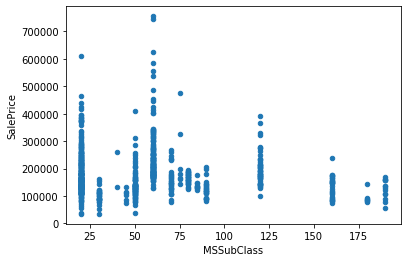

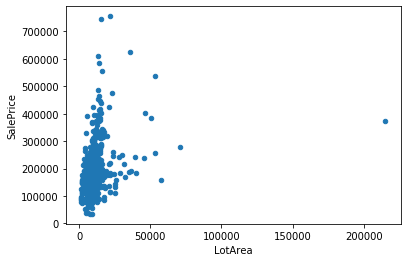

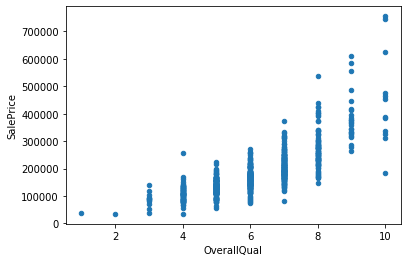

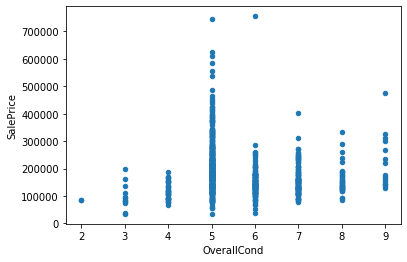

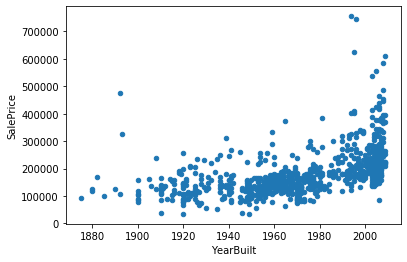

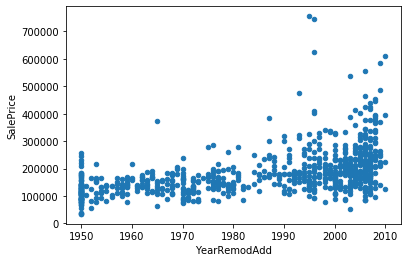

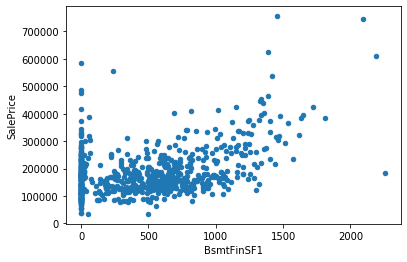

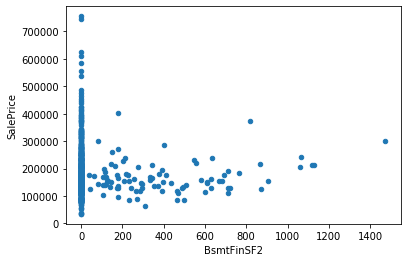

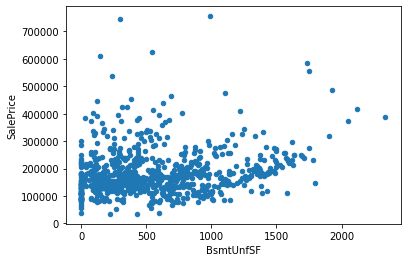

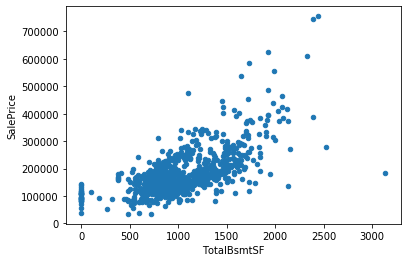

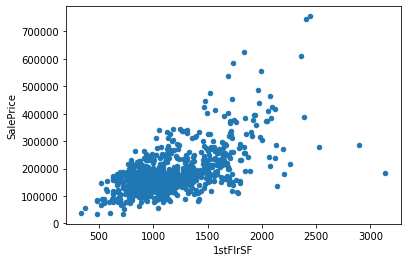

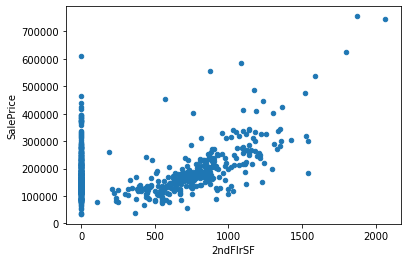

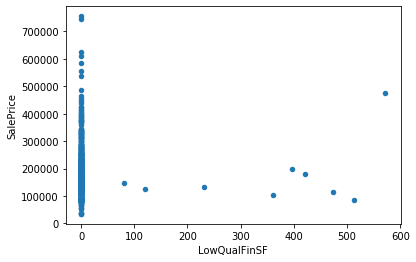

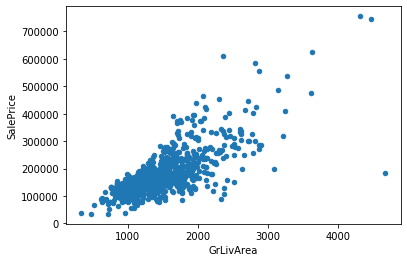

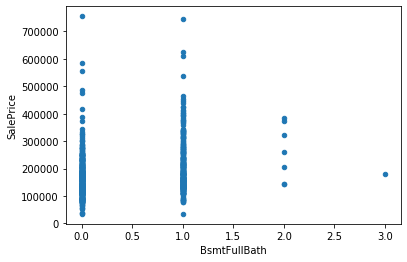

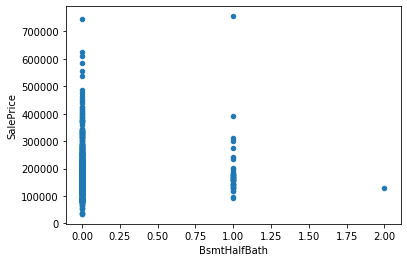

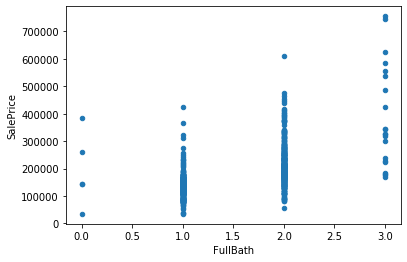

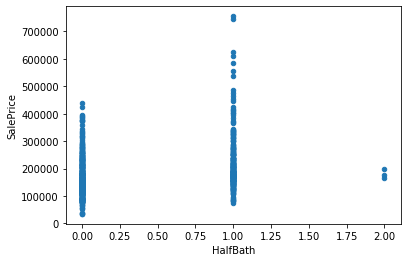

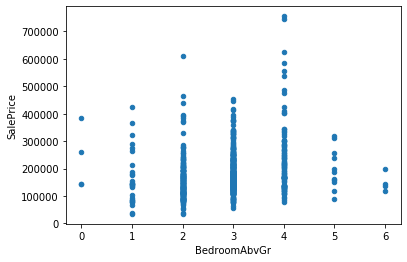

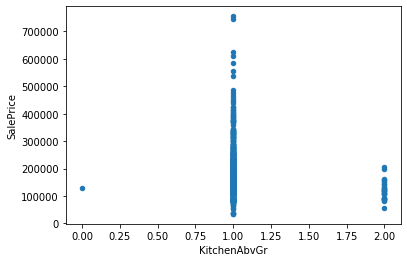

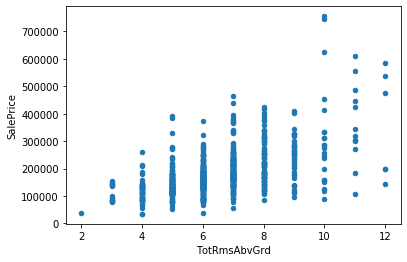

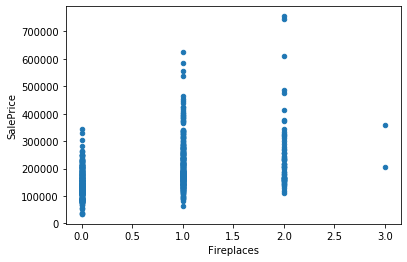

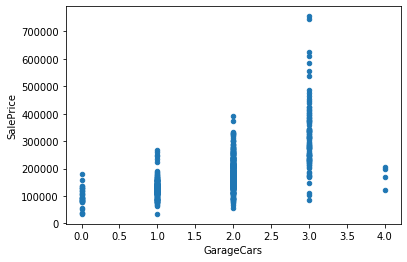

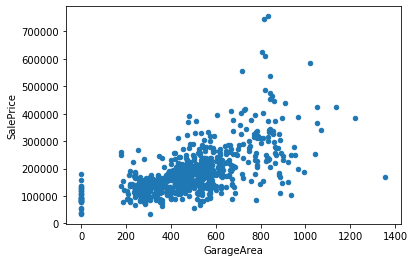

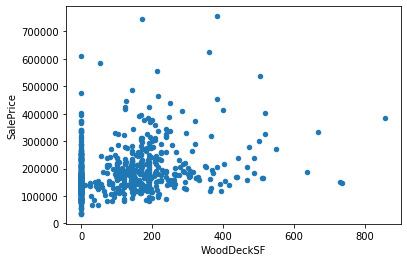

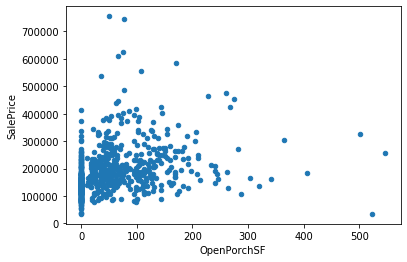

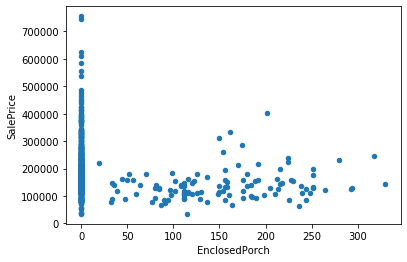

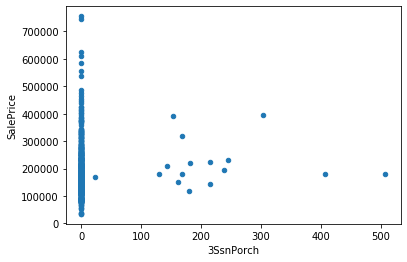

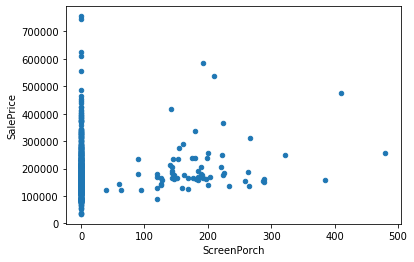

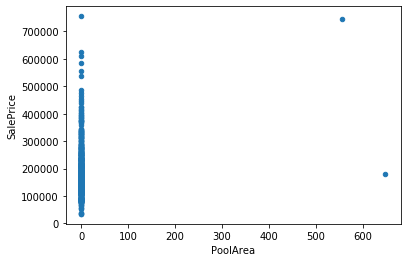

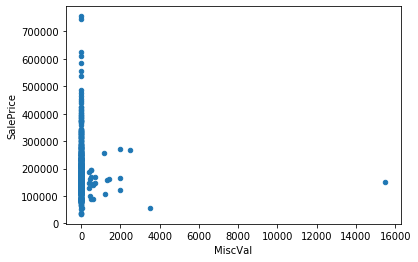

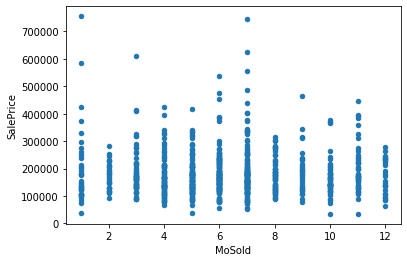

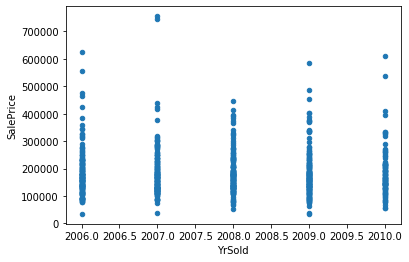

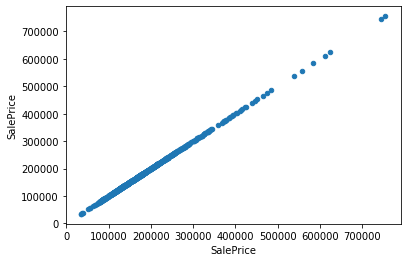

In [115]:
for i in trainDF.columns:
    trainDF.plot.scatter(i,'SalePrice')